In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as SK
import time
from Tools import *
%matplotlib inline

In [ ]:
M,N = (8,8)
Image1 = np.zeros((M,N))
Image2 = Image1.copy()

Image1[:,:int(N/2)] = 255.0
Image2[1::2,0::2] = 255.0
Image2[0::2,1::2] = 255.0

ShowTimeMul((Image1,Image2),Im_title=["Half","Chess"],figsize=(7,5),With_Hist=True,bins=64,His_Title=["Hist"]*2,cmaps=['gray']*2)

In [ ]:
Gaussian = np.array([
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]
])
Conv_Image1 = FastConv2D(Image1,Gaussian)
Conv_Image2 = FastConv2D(Image2,Gaussian)
ShowTimeMul((Conv_Image1,Conv_Image2),Im_title=["Blurred Half","Blurred Chess"],figsize=(7,5),With_Hist=True,bins=64,His_Title=["Hist"]*2,cmaps=['gray']*2)

In [ ]:
Equal_Image1 = SK.exposure.equalize_hist(Image1)*255
Equal_Image2 = SK.exposure.equalize_hist(Image2)*255
ShowTimeMul((Equal_Image1,Equal_Image2),Im_title=["Eq Half","Eq Chess"],figsize=(7,5),With_Hist=True,bins=64,His_Title=["Hist"]*2,cmaps=['gray']*2)

In [ ]:
Gamma_Image1 = SK.exposure.adjust_gamma(Image1,0.5)*255
Gamma_Image2 = SK.exposure.adjust_gamma(Image2,0.5)*255

ShowTimeMul((Gamma_Image1,Gamma_Image2),Im_title=["Gam Half","Gam Chess"],figsize=(7,5),With_Hist=True,bins=64,His_Title=["Hist"]*2,cmaps=['gray']*2)

#### The gaussian kernel for 2D Images
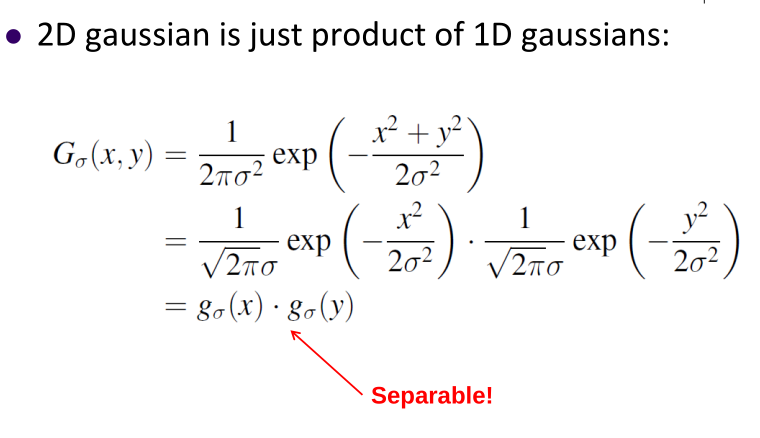

In [ ]:
def gauss(size,sigma):
    x = np.linspace(-(size)/2,(size)/2,size)
    tmp =1/(np.sqrt(2*np.pi*sigma)) * np.exp(-0.5*x**2/sigma**2)
    res = np.outer(tmp,tmp)
    return res/res.sum()

In [ ]:
G = gauss(5,4)
G.max() == G[2,2]
G

In [ ]:
g1 = gauss(5,sigma=0.5)
g2 = gauss(5,sigma=1.0)
g3 = gauss(5,sigma=2.0)
Image1_G1 = FastConv2D(Image1,g1)
Image1_G2 = FastConv2D(Image1,g2)
Image1_G3 = FastConv2D(Image1,g3)
Image2_G1 = FastConv2D(Image2,g1)
Image2_G2 = FastConv2D(Image2,g2)
Image2_G3 = FastConv2D(Image2,g3)

ShowTimeMul((Image1_G1,Image2_G1),With_Hist=True,Im_title=["Image1 with 0.5","Image2 with 0.5"],figsize=(7,5),His_Title=["Histogram"]*2,cmaps=["gray"]*2)
ShowTimeMul((Image1_G2,Image2_G2),With_Hist=True,Im_title=["Image1 with 1.0","Image2 with 1.0"],figsize=(7,5),His_Title=["Histogram"]*2,cmaps=["gray"]*2)
ShowTimeMul((Image1_G3,Image2_G3),With_Hist=True,Im_title=["Image1 with 2.0","Image2 with 2.0"],figsize=(7,5),His_Title=["Histogram"]*2,cmaps=["gray"]*2)